## **Non-Parametric Learning Models for Classification: Data Preparation, Model Building & Evaluation**

---

#### The goal of this exercise is to understand the classification pipeline in Python, particularly for a classification problem.

#### For this experiment, we use the Iris Species Dataset from Kaggle. The dataset can be accessed https://www.kaggle.com/datasets/uciml/iris. The dataset contains four features (Sepal Length, Sepal Width, Petal Length, Petal Width) and the corresponding species label for each of the 150 samples. These features can be taken as inputs to train a machine learning algorithm to map them to target Species outputs. We leverage the Non-parametric Models discussed in today's lecture. Then, we will evaluate the performance of different classifiers using some performance metrics.

#### Please make sure you go through each of the steps and play with the different variations. You can follow the same approach for a different dataset to solve binary or multi-class classification problems.

#### First we load the dataset and try to understand it   

#### To Do:
<ul>Load the Iris dataset from scikit-learn datasets</ul>
<ul>Get the features and corresponding class labels</ul>
<ul>Verify the shape of the features and labels</ul>


In [ ]:
#Import necessary packages
import numpy as np
import matplotlib.pyplot as plt

## Read the data

---


#### Understand it: check, analyze, visualize

In [ ]:
from sklearn import datasets #
iris = datasets.load_iris() #Get the dictionary

In [ ]:
#Check the keys
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

We see the keys are:    
* data: The data matrix (ndarray) of shape (150, 4)
* target: The classification target of shape (150,)
* target_names: The names of target classes
* feature_names: The names of the dataset columns
* and few others


We can verify the shapes of the features and target matrices. Also, any particular sample can be checked.

In [ ]:
'''First we extract the 'features' and 'target' from the dictionary'''
features = iris['data']
labels = iris['target']

In [ ]:
#Check the shapes of features and labels
features.shape, labels.shape

((150, 4), (150,))

In [ ]:
#Display the features
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

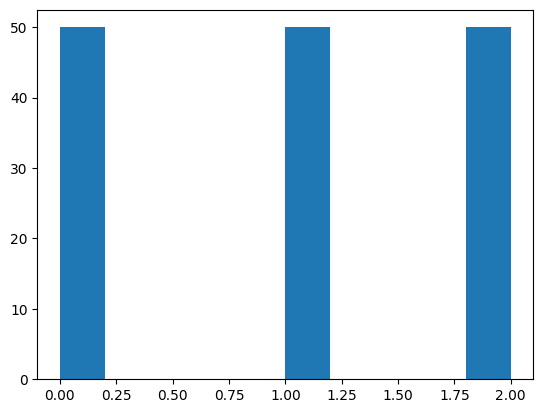

In [ ]:
#label distribution
plt.hist(labels)

We see the labels are equally distributed. That means, there are 50 samples per class in the dataset.

In [ ]:
#Then check the feature names and target names
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [ ]:
#Display any random sample: features and corresponding target label
idx = 100
features[idx], labels[idx]

(array([6.3, 3.3, 6. , 2.5]), 2)

In [ ]:
#Display any particular feature for the entire dataset
features[:, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

Now, let's do some plots to better understand the dataset. We can create scatter plot of the dataset by taking any two features at a time (sepal length and sepal width) and see if there is any recognizable pattern.

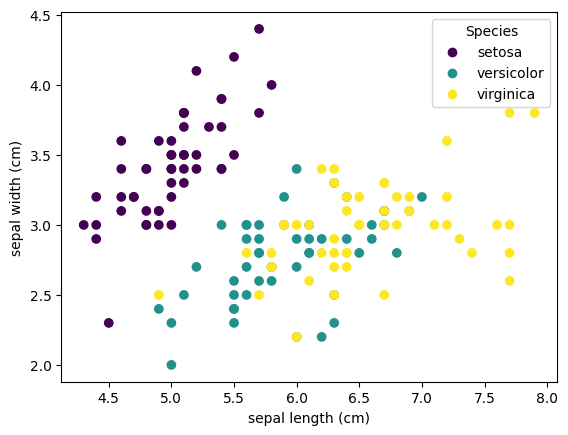

In [ ]:
#Scatter plot (sepal length, sepal width) withe the class labels
plt.subplots()
iris_plot = plt.scatter(features[:,0], features[:,1], c=labels)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris_plot.legend_elements()[0], iris.target_names, title='Species')

As you can see each element in the above scatter plot refers to one of the 150 Iris flowers in the dataset. The color indicates the corresponding Species. If you closely look at the plot, you will see a recognizable pattern for setosa (short and wide sepal). But the other two types have overlaps. We can first attempt to build our model using these two features to see how the model performs on a test set.

In [ ]:
#Take the first two features only for model training and evaluation
X = features[:,0:2]
y = labels

#Verify the shape
X.shape, y.shape

((150, 2), (150,))

## Split into Training and Testing

---

#### The general approach to evaulate any machine learning model is to split your data into train and test subsets: former subset is to train and the latter to test the trained model. In a standard split, 75% data are used in training and 25% for testing.

#### To Do:
<ul>Use the train_test_split function from scikit-learn.model_selection to split into train and test sets.</ul>

In [ ]:
from sklearn.model_selection import train_test_split

'''Split the dataset'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

'''Check the shapes/sizes'''
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

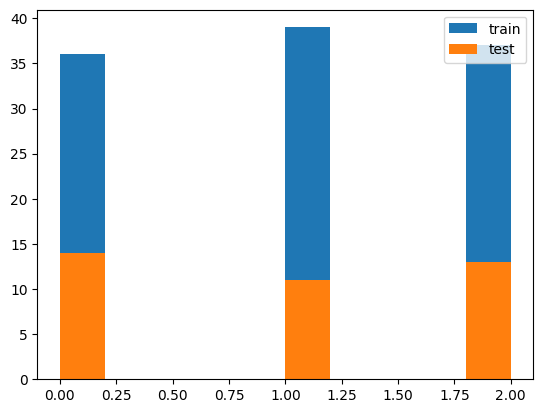

In [ ]:
#Distribution of classes in train and test data
plt.hist(y_train, label='train')
plt.hist(y_test, label='test')
plt.legend()

## **k-NN Classification Algorithm**

---

#### You can easily get this classifier from scikit-learn. For every classifier model, fit with the training data (features and targets). Then make predictions for the test data (features).

#### Obtain the predictions for the following classification algorithms:

<li>k-NN: k Nearest Neighbor Classification</li>

#### To Do:
<ul>Load the classifier from sklearn</ul>
<ul>For every classifier,
  <ul>build the model</ul>
  <ul>Fit the model with the training data set</ul>
  <ul>Make prediction on the test data set</ul>
</ul>

Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html for example, and understand different parameters you can pass to the model. Here, we take the default setting

In [ ]:
'''Load the classifier from scikit-learn'''
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
'''k-NN classification'''
#For training
kNN_Model = KNeighborsClassifier(n_neighbors=3)
kNN_Model.fit(X_train, y_train)

#For testing
y_pred = kNN_Model.predict(X_test)

### Decision Boundary

Since we are dealing with a classification problem containing only 2 features, it is then possible to observe the decision function boundary. The boundary is the rule used by our predictive model to affect a class label given the two feature values of the sample.

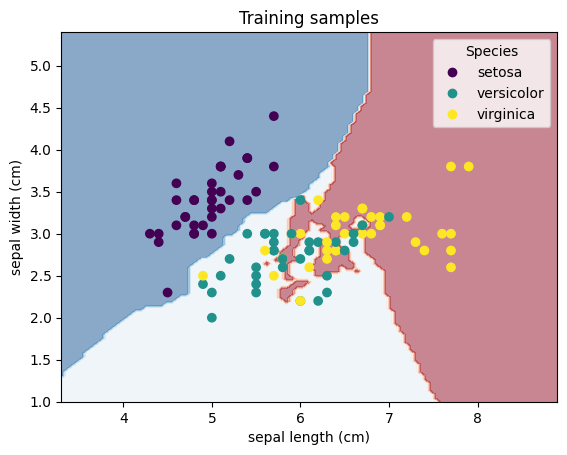

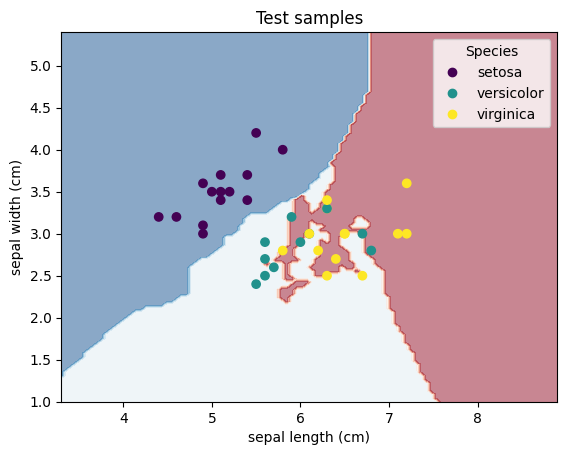

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    kNN_Model,
    X_train,
    response_method="predict",
    cmap="RdBu_r",
    alpha=0.5,
)
iris_plot = plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris_plot.legend_elements()[0], iris.target_names, title='Species')
plt.title('Training samples')
plt.show()


DecisionBoundaryDisplay.from_estimator(
    kNN_Model,
    X_train,
    response_method="predict",
    cmap="RdBu_r",
    alpha=0.5,
)
iris_plot = plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris_plot.legend_elements()[0], iris.target_names, title='Species')
plt.title('Test samples');

([<matplotlib.axis.YTick at 0x78964d138c40>,
 [Text(0, 0, 'setosa'), Text(0, 1, 'versicolor'), Text(0, 2, 'virginica')])

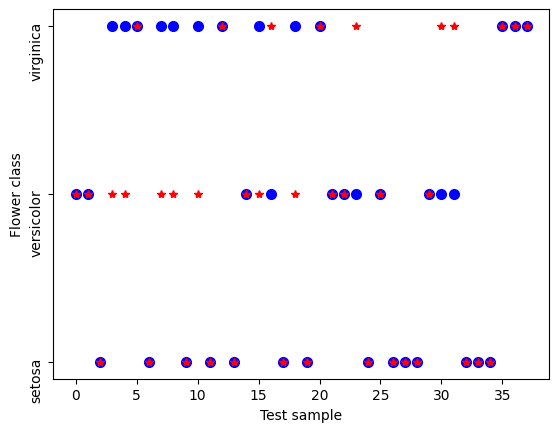

In [ ]:
#Compare the predictions
plt.plot(y_test, 'o', c='b', markersize=7)
plt.plot(y_pred, '*', c='r')
plt.xlabel('Test sample')
plt.ylabel('Flower class')
plt.yticks([0,1,2], iris.target_names, rotation=90)

## **Model Evaluation**

---

#### A number of evaluation metrics are available from scikit-learn.metrics that can be used for evaluating the performance of any machine learning model. We will be using the following metrics:
<li>Accuracy</li>
<li>Confusion Matrix</li>

Quiz code: **q7Lab1**


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [ ]:
print('kNN accuracy: ', 100*accuracy_score(y_test, y_pred))

kNN accuracy:  71.05263157894737


In [ ]:
print('kNN:\n', confusion_matrix(y_pred, y_test))

kNN:
 [[14  0  0]
 [ 0  7  7]
 [ 0  4  6]]


In [ ]:
F1 = f1_score(y_test, y_pred, average=None)
print('F1 score...')
print('Setosa: ', F1[0].round(3))
print('Versicolor: ', F1[1].round(3))
print('Virginica: ', F1[2].round(3))

F1 score...
Setosa:  1.0
Versicolor:  0.56
Virginica:  0.522


## **Decision Tree Classification Algorithm**

---

#### You can easily get this classifier from scikit-learn. For every classifier model, fit with the training data (features and targets). Then make predictions for the test data (features).

#### Obtain the predictions for the following classification algorithms:

<li>Decision Tree: Decision Tree Classification</li>

#### To Do:
<ul>Load the classifier from sklearn</ul>
<ul>For every classifier,
  <ul>build the model</ul>
  <ul>Fit the model with the training data set</ul>
  <ul>Make prediction on the test data set</ul>
</ul>

Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html for example, and understand different parameters you can pass to the model. Here, we take the default setting

In [ ]:
'''Load the classifier from scikit-learn'''
from sklearn.tree import DecisionTreeClassifier

In [ ]:
'''Decision Tree classification'''
#For training
DTree_Model = DecisionTreeClassifier()
DTree_Model.fit(X_train, y_train)

#For testing
y_dtree = DTree_Model.predict(X_test)

### Decision Boundary

Since we are dealing with a classification problem containing only 2 features, it is then possible to observe the decision function boundary. The boundary is the rule used by our predictive model to affect a class label given the two feature values of the sample.

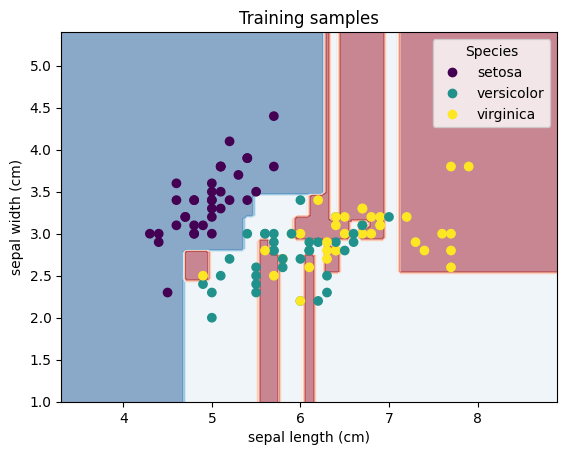

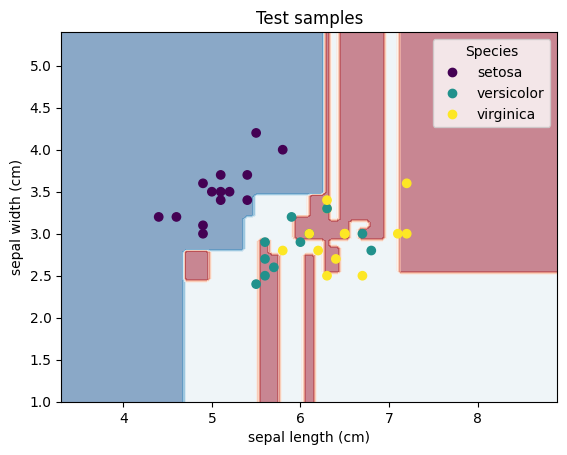

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    DTree_Model,
    X_train,
    response_method="predict",
    cmap="RdBu_r",
    alpha=0.5,
)
iris_plot = plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris_plot.legend_elements()[0], iris.target_names, title='Species')
plt.title('Training samples')
plt.show()


DecisionBoundaryDisplay.from_estimator(
    DTree_Model,
    X_train,
    response_method="predict",
    cmap="RdBu_r",
    alpha=0.5,
)
iris_plot = plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris_plot.legend_elements()[0], iris.target_names, title='Species')
plt.title('Test samples');

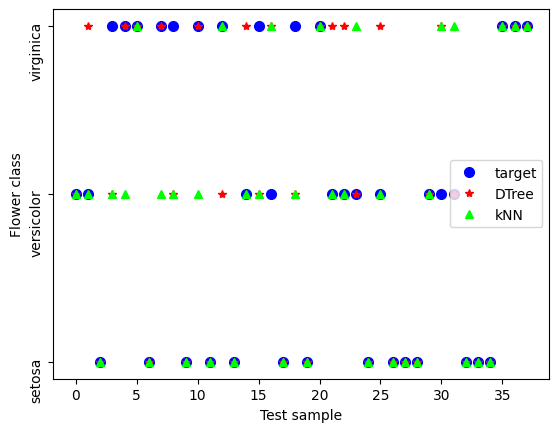

In [ ]:
#Compare the predictions
plt.plot(y_test, 'o', c='b', markersize=7, label='target')
plt.plot(y_dtree, '*', c='r', label='DTree')
plt.plot(y_pred, '^', c='lime', label='kNN')

plt.xlabel('Test sample')
plt.ylabel('Flower class')
plt.yticks([0,1,2], iris.target_names, rotation=90);
plt.legend(loc='best')

## **Model Evaluation**

---

#### A number of evaluation metrics are available from scikit-learn.metrics that can be used for evaluating the performance of any machine learning model. We will be using the following metrics:
* Accuracy
* Confusion Matrix
* F1 score



In [ ]:
print('DTree accuracy: ', 100*accuracy_score(y_test, y_dtree))

DTree accuracy:  68.42105263157895


In [ ]:
print('DTree:\n', confusion_matrix(y_dtree, y_test))

DTree:
 [[14  0  0]
 [ 0  4  5]
 [ 0  7  8]]


In [ ]:
F1 = f1_score(y_test, y_dtree, average=None)
print('F1 score...')
print('Setosa: ', F1[0].round(3))
print('Versicolor: ', F1[1].round(3))
print('Virginica: ', F1[2].round(3))

F1 score...
Setosa:  1.0
Versicolor:  0.4
Virginica:  0.571
